># Python Programming Assignment 

Start Date : 

* Marks Weight = 
** Total Marks = 100 
* Due Date = 
> ## Data Cleaning and Basic Plotting

BA Program

* **Student Name** : Alli Folorunsho
* **Student ID** : 8905943

## Q1) 

Download the file "BA Program Assignment 3 - Data Cleaning.xlsx”  .  Use appropriate data cleaning techniques and methods in Pandas to convert the raw file into  clean data structure ” as shown in the reference file "Your Assignment3 output file should look like this.xlsx" and answer the questions below. 

Your answers should be accurate.  All cleaning and manipulation should be done in Python only. Be careful for subtotals in the data to avoid double counting. **(50 marks)**



### Paste your cleaning code to convert the raw file to the clean file below , 

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('BA Program Assignment 3 - Data Cleaning.xlsx')

#remove all the spaces for the entire table
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Drop the previous column headers
df = df.drop([0,1,2,4]).reset_index(drop=True)

# Set the fourth row as the column headers
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

#drop every single empty row
df = df.dropna(how='all')
df.reset_index(drop=True, inplace=True)

#removing the spaces before and and after each column entry
df.columns = df.columns.str.strip()

# Drop rows based on conditions
df = df[~df['Player Name'].isin(['Gran Total Stats of All the above players', 'Player Runs Total', 'Total Player Runs'])].reset_index(drop=True)

#fill down to complete the empty cells
df['Player Name'].fillna(method='ffill', inplace=True), df['Player Code'].fillna(method='ffill', inplace=True)

#some rows did not fill down, so they were converted to NaN before the fill was applied
df['Player Name'].replace('', np.nan, inplace=True), df['Player Name'].fillna(method='ffill', inplace=True)

#reset the index and convert to integer for the wickets column
df = df.reset_index(drop=True)
df.index = df.index + 1
df.head(20)

,Player Code,Player Name,Match Number,Number of Wickets Taken,NaN,Number of Runs
1,45234,Maud Nicholson,M1,2,NaN,82
2,45234,Maud Nicholson,M3,3,NaN,71
3,45234,Maud Nicholson,M5,0,NaN,36
4,45234,Maud Nicholson,M6,1,NaN,76
5,4578,Logan Thomas,M1,0,NaN,4
6,4578,Logan Thomas,M3,1,NaN,38
7,4545,Avaya Burris,M1,0,NaN,57
8,4545,Avaya Burris,M3,0,NaN,76
9,4545,Avaya Burris,M5,0,NaN,28
10,4456,Marlie Stacey,M1,0,NaN,87



#### Write the full code that lead to the answer of each of the following questions in the single cell below each question.

## Q2) What is the grand total number of wickets taken by all the players ? 
**10 marks**

In [54]:
grand_total_wickets = df['Number of Wickets Taken'].sum()
grand_total_wickets

268

## Q3) What is the total number of runs made in *each* match (M1 till M8) ? 
**10 marks**

In [55]:
total_runs_per_match = df.groupby('Match Number')['Number of Runs'].sum()
total_runs_per_match

Match Number
M1    3623
M2     259
M3    2309
M4      19
M5    1124
M6      83
M7      68
M8      31
Name: Number of Runs, dtype: object

## Q4) Show the average number of runs made in each Match (M1 till M8)  using a bar graph. 
**10 marks**

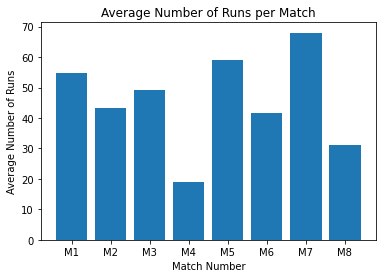

In [33]:
average_runs_per_match = df.groupby('Match Number')['Number of Runs'].mean()

# Create a bar graph
plt.bar(average_runs_per_match.index, average_runs_per_match.values)

# Add labels and title
plt.xlabel('Match Number')
plt.ylabel('Average Number of Runs')
plt.title('Average Number of Runs per Match')

# Display the bar graph
plt.show()

## Q5) Import the tips dataset from seaborn package and complete the parts below , 
5a) Find out the correlation between total bill, tip and size column using appropriate data frame method. 

5b) Show the result of question 4 in a form of a seaborn package heatmap. 

**20 marks**

In [35]:
tips = sns.load_dataset('tips')

In [44]:
#correlation between total_bill, tip, and size
correlation = tips[['total_bill', 'tip', 'size']].corr()

# Print the correlation matrix
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


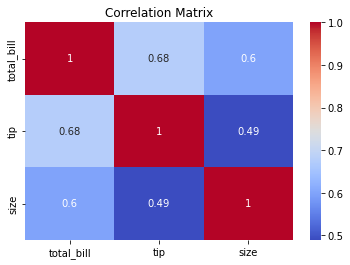

In [37]:
#Heatmap of the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Title
plt.title('Correlation Matrix')

plt.show()